# Setup

In [1]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

No of images in training set: 835
No of images in validation set: 104
No of images in test set: 105
No of images in feeder set: 15079
Labels: ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
Labels (feeder): ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']


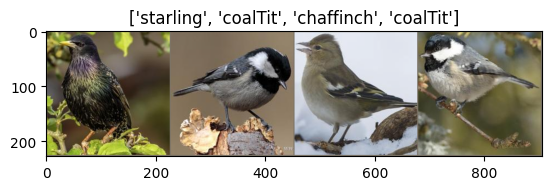

In [2]:
%run setup.ipynb 

# Training with augmentation

Now we've trained our model and assessed its performance on the feeder data... it's not the worst, but let's see if we can't make it a bit stronger by adding augmentations.

## Augmentation round 1

First, just gonna mess up the pictures a little - no sciency arguments for it other than intuitively trying to capture that the feeder images are more grainy and the birds are not always perfectly posed (hence the crop).

In [3]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation1 = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug1 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation1)
dataloader_train_aug1 = torch.utils.data.DataLoader(dataset_train_aug1, batch_size=8, shuffle=True, num_workers=4)

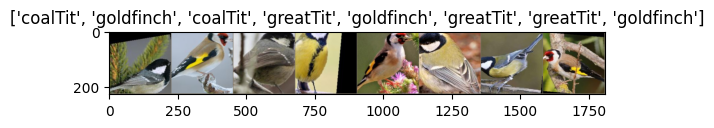

In [4]:
# looking at the augmentations..
inputs, classes = next(iter(dataloader_train_aug1))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_labels[x] for x in classes])

Load in a fresh ResNet50 that's prepped for transfer learning

In [5]:
# load "clean" resnet50
untrained_model_aug1 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug1) # FIXME does this change?

### Training
First with the frozen layers, then unfreeze for finetuning

In [6]:
freezetrained_model_aug1, _ = train_model(model=untrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1)

Epoch 1/24
----------
Train Loss: 1.8147 Acc: 0.3976
Val Loss: 1.6623 Acc: 0.5769
Epoch time 1m 13s
----------

Epoch 2/24
----------
Train Loss: 1.5023 Acc: 0.7210
Val Loss: 1.4201 Acc: 0.8462
Epoch time 1m 10s
----------

Epoch 3/24
----------
Train Loss: 1.2824 Acc: 0.7892
Val Loss: 1.2006 Acc: 0.8846
Epoch time 1m 9s
----------

Epoch 4/24
----------
Train Loss: 1.1318 Acc: 0.8036
Val Loss: 1.0600 Acc: 0.9135
Epoch time 1m 8s
----------

Epoch 5/24
----------
Train Loss: 1.0176 Acc: 0.8108
Val Loss: 0.9735 Acc: 0.8750
Epoch time 1m 8s
----------

Epoch 6/24
----------
Train Loss: 0.9793 Acc: 0.7964
Val Loss: 0.8854 Acc: 0.8846
Epoch time 1m 9s
----------

Epoch 7/24
----------
Train Loss: 0.8796 Acc: 0.8539
Val Loss: 0.8060 Acc: 0.9231
Epoch time 1m 9s
----------

Epoch 8/24
----------
Train Loss: 0.8136 Acc: 0.8443
Val Loss: 0.7544 Acc: 0.9038
Epoch time 1m 10s
----------

Epoch 9/24
----------
Train Loss: 0.7770 Acc: 0.8431
Val Loss: 0.7118 Acc: 0.8942
Epoch time 1m 10s
---------

In [7]:
unfreeze_layers(freezetrained_model_aug1)
model_aug1, model_aug1_info = train_model(model=freezetrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1)

Epoch 1/24
----------
Train Loss: 0.4084 Acc: 0.8982
Val Loss: 0.6976 Acc: 0.8942
Epoch time 1m 51s
----------

Epoch 2/24
----------
Train Loss: 0.2531 Acc: 0.9257
Val Loss: 0.0997 Acc: 0.9904
Epoch time 1m 50s
----------

Epoch 3/24
----------
Train Loss: 0.2027 Acc: 0.9365
Val Loss: 0.0837 Acc: 0.9904
Epoch time 1m 50s
----------

Epoch 4/24
----------
Train Loss: 0.1993 Acc: 0.9305
Val Loss: 0.0833 Acc: 0.9904
Epoch time 1m 50s
----------

Epoch 5/24
----------
Train Loss: 0.1549 Acc: 0.9449
Val Loss: 0.0662 Acc: 0.9808
Epoch time 1m 50s
----------

Epoch 6/24
----------
Train Loss: 0.1299 Acc: 0.9629
Val Loss: 0.0711 Acc: 0.9904
Epoch time 1m 50s
----------

Epoch 7/24
----------
Train Loss: 0.1105 Acc: 0.9689
Val Loss: 0.0661 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 8/24
----------
Train Loss: 0.1158 Acc: 0.9665
Val Loss: 0.0548 Acc: 0.9904
Epoch time 1m 51s
----------

Epoch 9/24
----------
Train Loss: 0.0848 Acc: 0.9737
Val Loss: 0.0503 Acc: 0.9904
Epoch time 1m 51s
----

### Round 1 results

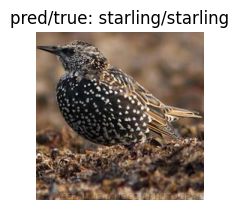

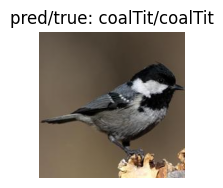

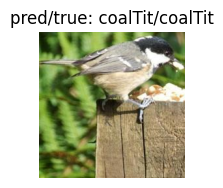

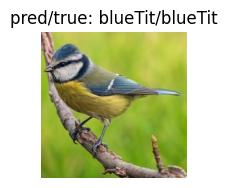

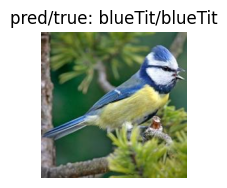

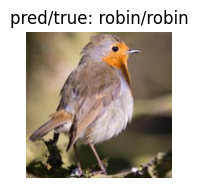

In [8]:
visualize_model(model_aug1, dataloader_tiny_val, class_labels, device)

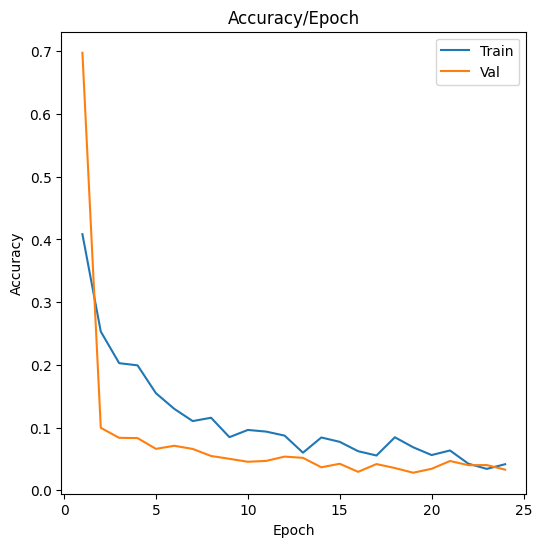

In [9]:
plot_accuracies(model_aug1_info["train_loss"], model_aug1_info["val_loss"], ["Train", "Val"])

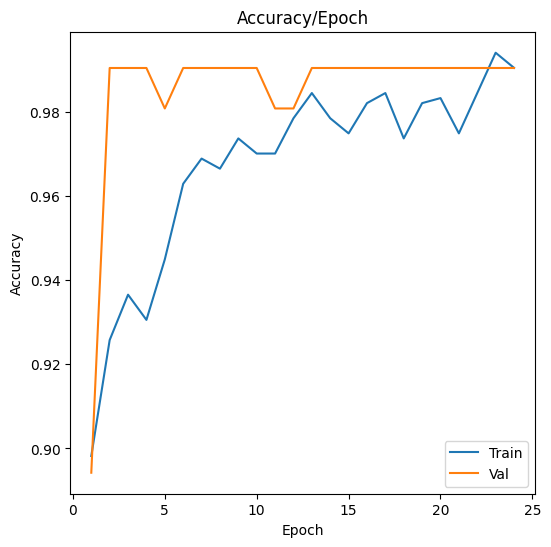

In [10]:
plot_accuracies(model_aug1_info["train_acc"], model_aug1_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  3  0 12  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 97.14285714285714


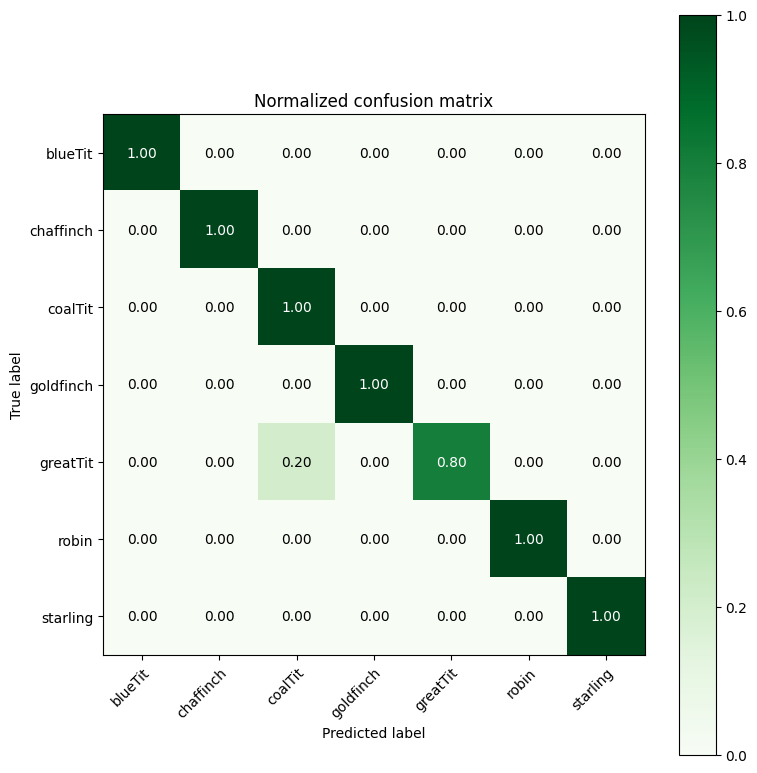

In [11]:
truel, predl = makeAll(dataloader_test, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


In [12]:
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.83      1.00      0.91        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.80      0.89        15
       robin       1.00      1.00      1.00        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.97       105
   macro avg       0.98      0.97      0.97       105
weighted avg       0.98      0.97      0.97       105



## Augmentation Round 2

Add blur and colorjitter

In [13]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.1), # Added
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug2 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation2)
dataloader_train_aug2 = torch.utils.data.DataLoader(dataset_train_aug2, batch_size=8, shuffle=True, num_workers=4)

Load in a fresh ResNet50 that's prepped for transfer learning

In [14]:
# load "clean" resnet50
untrained_model_aug2 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug2) 


### Training
First with the frozen layers, then unfreeze for finetuning

In [15]:
freezetrained_model_aug2, _ = train_model(model=untrained_model_aug2, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug2) 

Epoch 1/24
----------
Train Loss: 1.8257 Acc: 0.4012
Val Loss: 1.7831 Acc: 0.4615
Epoch time 1m 10s
----------

Epoch 2/24
----------
Train Loss: 1.5855 Acc: 0.5701
Val Loss: 1.6550 Acc: 0.5385
Epoch time 1m 10s
----------

Epoch 3/24
----------
Train Loss: 1.3876 Acc: 0.6683
Val Loss: 1.5757 Acc: 0.5577
Epoch time 1m 10s
----------

Epoch 4/24
----------
Train Loss: 1.2624 Acc: 0.7114
Val Loss: 1.5190 Acc: 0.5962
Epoch time 1m 10s
----------

Epoch 5/24
----------
Train Loss: 1.1771 Acc: 0.7257
Val Loss: 1.4026 Acc: 0.6538
Epoch time 1m 10s
----------

Epoch 6/24
----------
Train Loss: 1.0931 Acc: 0.7545
Val Loss: 1.4063 Acc: 0.6058
Epoch time 1m 10s
----------

Epoch 7/24
----------
Train Loss: 1.0124 Acc: 0.7629
Val Loss: 1.2960 Acc: 0.7115
Epoch time 1m 10s
----------

Epoch 8/24
----------
Train Loss: 0.9646 Acc: 0.7725
Val Loss: 1.2879 Acc: 0.6731
Epoch time 1m 10s
----------

Epoch 9/24
----------
Train Loss: 0.9621 Acc: 0.7689
Val Loss: 1.2311 Acc: 0.6731
Epoch time 1m 9s
-----

In [16]:
unfreeze_layers(freezetrained_model_aug2)
model_aug2, model_aug2_info = train_model(model=freezetrained_model_aug2, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug2)

Epoch 1/24
----------
Train Loss: 0.5850 Acc: 0.8240
Val Loss: 0.5093 Acc: 0.9038
Epoch time 1m 51s
----------

Epoch 2/24
----------
Train Loss: 0.4162 Acc: 0.8611
Val Loss: 0.4403 Acc: 0.8654
Epoch time 1m 51s
----------

Epoch 3/24
----------
Train Loss: 0.3301 Acc: 0.8874
Val Loss: 0.3367 Acc: 0.9231
Epoch time 1m 51s
----------

Epoch 4/24
----------
Train Loss: 0.2754 Acc: 0.9054
Val Loss: 0.2976 Acc: 0.8942
Epoch time 1m 51s
----------

Epoch 5/24
----------
Train Loss: 0.2358 Acc: 0.9353
Val Loss: 0.3413 Acc: 0.9038
Epoch time 1m 50s
----------

Epoch 6/24
----------
Train Loss: 0.2010 Acc: 0.9257
Val Loss: 0.2079 Acc: 0.9231
Epoch time 1m 51s
----------

Epoch 7/24
----------
Train Loss: 0.1924 Acc: 0.9389
Val Loss: 0.1727 Acc: 0.9327
Epoch time 1m 51s
----------

Epoch 8/24
----------
Train Loss: 0.1614 Acc: 0.9485
Val Loss: 0.1838 Acc: 0.9327
Epoch time 1m 51s
----------

Epoch 9/24
----------
Train Loss: 0.1896 Acc: 0.9341
Val Loss: 0.1428 Acc: 0.9615
Epoch time 1m 51s
----

### Round 2 Results

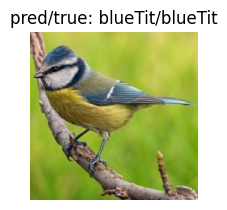

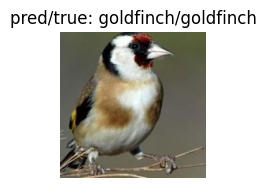

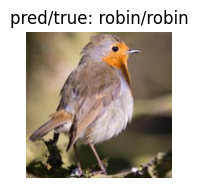

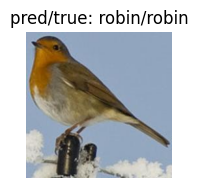

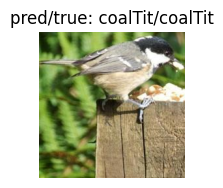

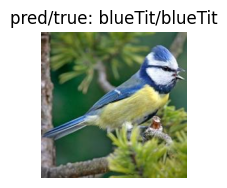

In [17]:
visualize_model(model_aug2, dataloader_tiny_val, class_labels, device)

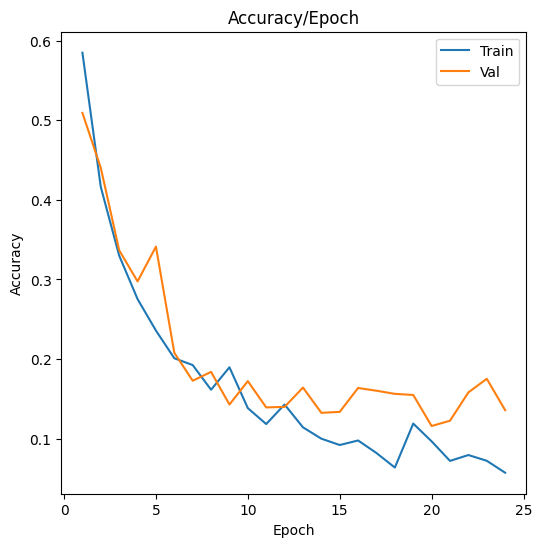

In [18]:
plot_accuracies(model_aug2_info["train_loss"], model_aug2_info["val_loss"], ["Train", "Val"])

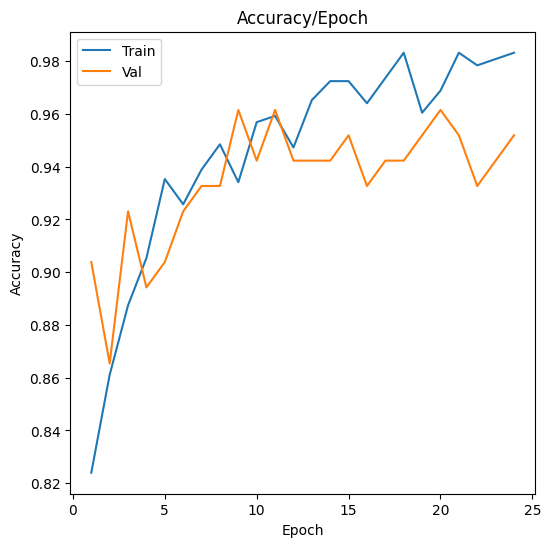

In [19]:
plot_accuracies(model_aug2_info["train_acc"], model_aug2_info["val_acc"], ["Train", "Val"])

[[14  0  1  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 13  0  1  0  1]
 [ 0  0  0 15  0  0  0]
 [ 0  0  3  0 12  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 94.28571428571428


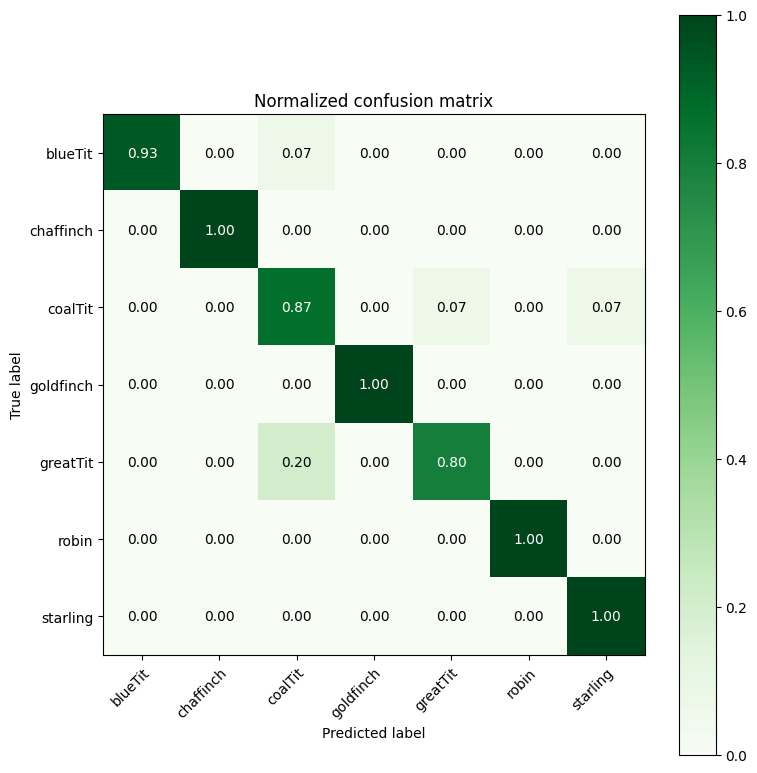

In [20]:
truel, predl = makeAll(dataloader_test, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [21]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      0.93      0.97        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.76      0.87      0.81        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       0.92      0.80      0.86        15
       robin       1.00      1.00      1.00        15
    starling       0.94      1.00      0.97        15

    accuracy                           0.94       105
   macro avg       0.95      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



## Augmentation round 3

Try without jitter

In [22]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation3 = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug3 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation3)
dataloader_train_aug3 = torch.utils.data.DataLoader(dataset_train_aug3, batch_size=8, shuffle=True, num_workers=4)

Load in a fresh ResNet50 that's prepped for transfer learning

In [23]:
# load "clean" resnet50
untrained_model_aug3 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug3) 

### Training
First with the frozen layers, then unfreeze for finetuning

In [24]:
freezetrained_model_aug3, _ = train_model(model=untrained_model_aug3, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug3) 

Epoch 1/24
----------
Train Loss: 1.8009 Acc: 0.3593
Val Loss: 1.8361 Acc: 0.2981
Epoch time 1m 10s
----------

Epoch 2/24
----------
Train Loss: 1.4878 Acc: 0.7114
Val Loss: 1.7067 Acc: 0.3846
Epoch time 1m 9s
----------

Epoch 3/24
----------
Train Loss: 1.2767 Acc: 0.7389
Val Loss: 1.6118 Acc: 0.4519
Epoch time 1m 10s
----------

Epoch 4/24
----------
Train Loss: 1.1576 Acc: 0.7677
Val Loss: 1.5407 Acc: 0.4519
Epoch time 1m 10s
----------

Epoch 5/24
----------
Train Loss: 1.0526 Acc: 0.7689
Val Loss: 1.5217 Acc: 0.4423
Epoch time 1m 9s
----------

Epoch 6/24
----------
Train Loss: 0.9885 Acc: 0.7796
Val Loss: 1.4719 Acc: 0.5481
Epoch time 1m 10s
----------

Epoch 7/24
----------
Train Loss: 0.8812 Acc: 0.8204
Val Loss: 1.4760 Acc: 0.4231
Epoch time 1m 8s
----------

Epoch 8/24
----------
Train Loss: 0.8605 Acc: 0.8180
Val Loss: 1.4133 Acc: 0.5385
Epoch time 1m 8s
----------

Epoch 9/24
----------
Train Loss: 0.7969 Acc: 0.8383
Val Loss: 1.3549 Acc: 0.5865
Epoch time 1m 8s
---------

In [25]:
unfreeze_layers(freezetrained_model_aug3)
model_aug3, model_aug3_info = train_model(model=freezetrained_model_aug3, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug3)

Epoch 1/24
----------
Train Loss: 0.4991 Acc: 0.8575
Val Loss: 0.5442 Acc: 0.8558
Epoch time 1m 50s
----------

Epoch 2/24
----------
Train Loss: 0.3387 Acc: 0.8910
Val Loss: 0.4707 Acc: 0.8558
Epoch time 1m 51s
----------

Epoch 3/24
----------
Train Loss: 0.2587 Acc: 0.9126
Val Loss: 0.5937 Acc: 0.7885
Epoch time 1m 51s
----------

Epoch 4/24
----------
Train Loss: 0.2052 Acc: 0.9329
Val Loss: 0.3760 Acc: 0.8750
Epoch time 1m 51s
----------

Epoch 5/24
----------
Train Loss: 0.2191 Acc: 0.9305
Val Loss: 0.3296 Acc: 0.8942
Epoch time 1m 54s
----------

Epoch 6/24
----------
Train Loss: 0.1675 Acc: 0.9437
Val Loss: 0.3400 Acc: 0.9231
Epoch time 1m 53s
----------

Epoch 7/24
----------
Train Loss: 0.1594 Acc: 0.9413
Val Loss: 0.2808 Acc: 0.9231
Epoch time 2m 32s
----------

Epoch 8/24
----------
Train Loss: 0.1316 Acc: 0.9629
Val Loss: 0.3195 Acc: 0.8750
Epoch time 7m 58s
----------

Epoch 9/24
----------
Train Loss: 0.1385 Acc: 0.9617
Val Loss: 0.3039 Acc: 0.9135
Epoch time 1m 50s
----

### Round 3 Results

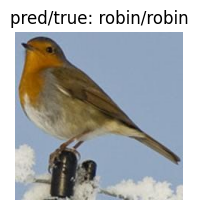

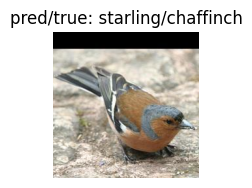

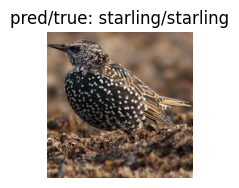

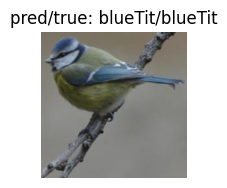

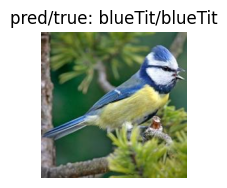

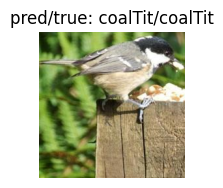

In [26]:
visualize_model(model_aug3, dataloader_tiny_val, class_labels, device)

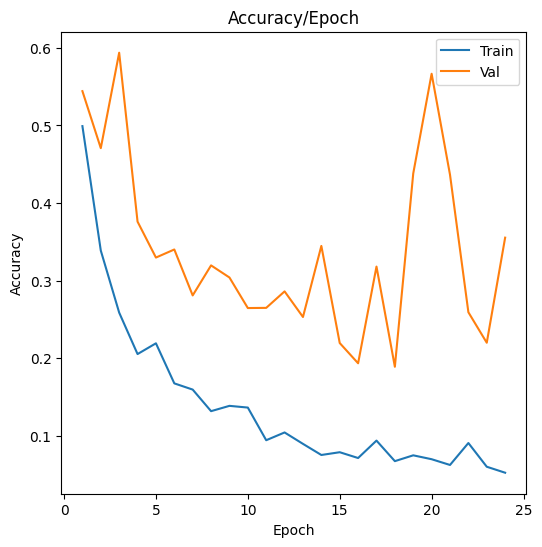

In [27]:
plot_accuracies(model_aug3_info["train_loss"], model_aug3_info["val_loss"], ["Train", "Val"])

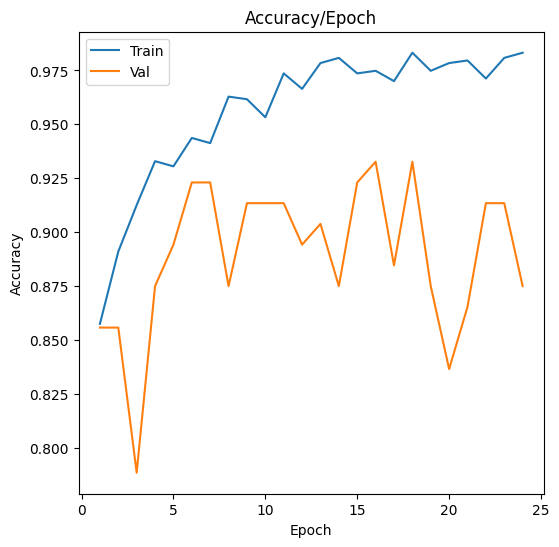

In [28]:
plot_accuracies(model_aug3_info["train_acc"], model_aug3_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  1]
 [ 0  0 14  0  0  0  1]
 [ 0  0  0 15  0  0  0]
 [ 0  0  4  0 11  0  0]
 [ 0  1  0  0  0 14  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 93.33333333333333


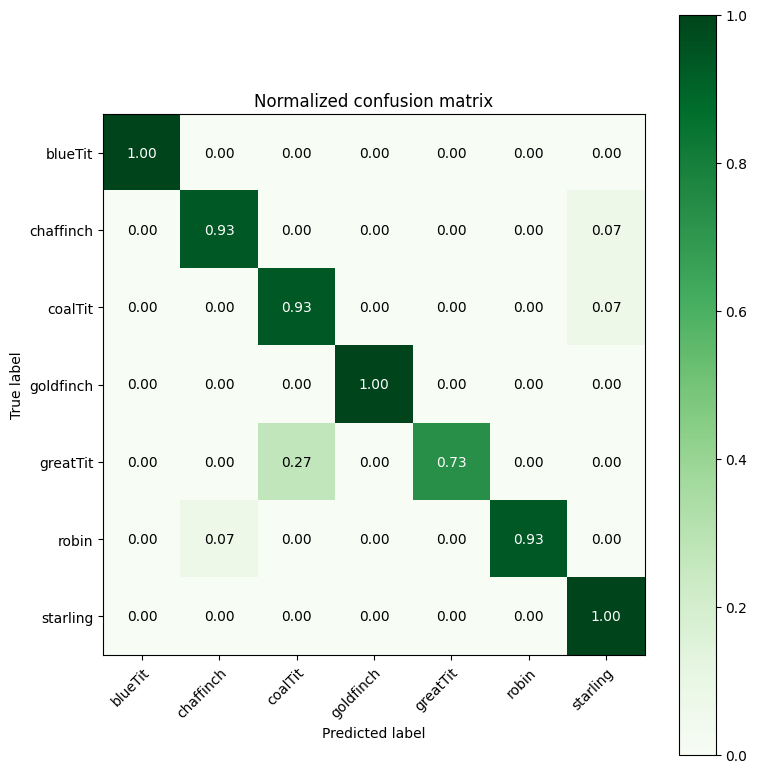

In [29]:
truel, predl = makeAll(dataloader_test, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [30]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       0.93      0.93      0.93        15
     coalTit       0.78      0.93      0.85        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.73      0.85        15
       robin       1.00      0.93      0.97        15
    starling       0.88      1.00      0.94        15

    accuracy                           0.93       105
   macro avg       0.94      0.93      0.93       105
weighted avg       0.94      0.93      0.93       105

